In [1]:
import sympy
sympy.init_printing()
(u_max,u_star,rho_max,
rho_star,A,B) = sympy.symbols('u_max u_star rho_max rho_star A B')

In [2]:
eq1 = sympy.Eq(0,u_max*rho_max*(1-A*rho_max-B*rho_max**2))
eq2 = sympy.Eq(0,u_max*(1-2*A*rho_star-3*B*rho_star**2))
eq3 = sympy.Eq(u_star,u_max*(1-A*rho_star-B*rho_star**2))

In [3]:
eq1

In [4]:
eq2

In [5]:
eq3

In [6]:
eq2- 3*eq3

In [7]:
eq4 = sympy.Eq(eq2.lhs-3*eq3.lhs,eq2.rhs-3*eq3.rhs)
eq4

In [8]:
eq4.simplify()

In [9]:
eq4

In [10]:
eq4.expand()

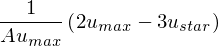

In [11]:
rho_sol = sympy.solve(eq4,rho_star)[0]
rho_sol

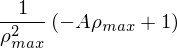

In [12]:
B_sol = sympy.solve(eq1,B)[0]
B_sol

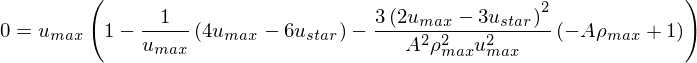

In [13]:
quadA = eq2.subs([(rho_star,rho_sol),(B,B_sol)])
quadA

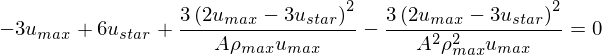

In [14]:
quadA.simplify()

In [15]:
A_sol = sympy.solve(quadA, A)

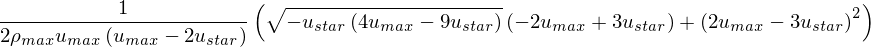

In [16]:
A_sol[0]

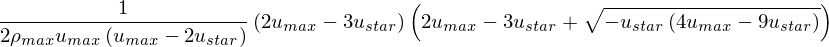

In [17]:
A_sol[1]

In [18]:
aval_a =A_sol[0].evalf(subs={u_star:1.5,u_max:2.0,rho_max:15.0})
aval_a

In [19]:
aval_b =A_sol[1].evalf(subs={u_star:1.5,u_max:2.0,rho_max:15.0})
aval_b

In [20]:
if aval_a>aval_b:
    aval = aval_a
else:
    aval = aval_b

In [21]:
aval

In [22]:
bval = B_sol.evalf(subs={rho_max:15.0,A:aval})
bval

In [23]:
sympy.init_printing(use_latex=False)

In [24]:
print(type(rho_max),type(u_max))

<class 'sympy.core.symbol.Symbol'> <class 'sympy.core.symbol.Symbol'>


In [25]:
rho_max =15
u_max =2

In [26]:
def computeF(u_max,rho,aval,bval):
    return u_max*rho*(1-aval*rho-bval*rho**2)

In [27]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [28]:
def rho_green_light(nx, rho_light):

    rho_initial = numpy.arange(nx)*2./nx*rho_light  # Before stoplight
    rho_initial[int((nx-1)/2):] = 0
    
    return rho_initial

In [29]:
nx = 81
nt = 30
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)

rho_light = 5.5

In [30]:
rho_initial = rho_green_light(nx, rho_light)

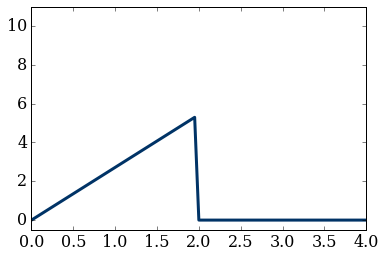

In [31]:
pyplot.plot(x, rho_initial, color='#003366', ls='-', lw=3)
pyplot.ylim(-0.5,11.);

In [32]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho))) 
    
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho, aval, bval)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()

    return rho_n

In [33]:
sigma = 1.
dt = sigma*dx/u_max

rho_n = ftbs(rho_initial, nt, dt, dx, rho_max, u_max)

In [34]:
from matplotlib import animation
from IPython.display import HTML

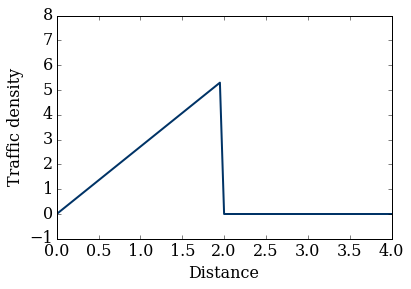

In [35]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-1,8),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)

In [36]:
HTML(anim.to_html5_video())

** Maximum Density Limit **

$$ \frac{\partial F}{\partial\rho} = \frac{\partial (u_{max}\rho(1-A\rho-B\rho^2))}{\partial\rho}$$

In [50]:
coeff = [-3*2*bval, -2*2*aval, 2]
root = numpy.roots(coeff)
print('Max theoretical density =',root[-1])

Max theoretical density = 8.43070330817
